<a href="https://colab.research.google.com/github/ClaraL27/NNDS-2023/blob/main/1796575_NNDS_2023_Final_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks for Data Science Applications
## End-of-term homework: Advanced transfer learning

**Name**: *Clara Lecce*

**Matricola**: *1796575*

> ✍ Upload the completed notebook **at least two days** before your expected exam's date on the Google Classroom page. For example, for the **January 12th** session, you should upload it by **January 9th, 23:59 Rome time**.

In [ ]:
!pip -q install --upgrade keras-nlp
!pip -q install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.4/508.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 28.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatibl

In [ ]:
import keras_nlp
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
import math
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import contractions

tf.get_logger().setLevel('ERROR')

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# To ensure reproducible results (as much as possible)
tf.keras.utils.set_random_seed(1234)

### Instructions

1. The homework is divided into two exercises. The first one (**10 points**) is mandatory for everyone. The second one (**5 points**) is mandatory only if you have not submitted the first homework or if you want to increase the mark.
2. If you score well on the project but poorly on the oral, the grade can be kept for the entire academic year (up to October 2024).

**IMPORTANT - read carefully before starting**:

> 🟨 *External material*: if you use any external material or inspiration for the code, reference it *explicitly* in the corresponding cell. For the textual descriptions, copy-paste *is not allowed*. <ins>Not following these two points is an immediate 0 mark</ins>.

> 🔵 *Grammar*: for the textual descriptions, I will remove points for too many grammatical or textual errors. Please try to be precise and provide nice-to-read descriptions, like if you were writing a report.

> 🟥 *Vectorization and TensorFlow*: the homework must be done _fully in TensorFlow_ and vectorizing the code as much as possible (e.g., do not loop explicitly over the batch dimension).

> 🟪 *Math*: you can also use LaTeX in Markdown if you need to write equations or if you need generic math notation.

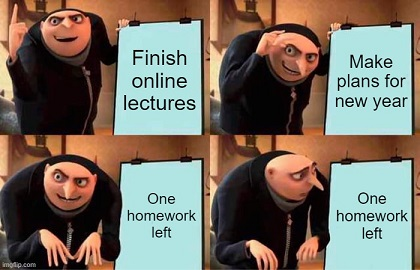

## Warmup: Data loading

**For this part, select an interesting dataset.**

*   This is similar to [Exercise 1 from the mid-term homework](https://colab.research.google.com/drive/1oDbshJeY62Id1O5pbsCrNFX9PdSY1ITP?usp=sharing), which you can check for completeness.
*   You should use a **different dataset** from the first homework, possibly of higher complexity.
*   Any data type (tabular, images, videos, audio, time-series, graphs, ...) is okay.

✍ **DESCRIPTION OF THE CODE**

*Provide a SHORT description of the dataset below (e.g., source, task, bibliographic reference if necessary...), both as text and in the comments of the code.*

**TODO**: For this final homework, I chose the "Emotion dataset" provided by Kaggle at this [link](https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp/). This dataset contains a list of documents with emotino flag, and it's splitted in train (16,000 rows), test (2,000 rows) & validation set (2,000 rows).

In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
# Download the emotions dataset from kaggle
!kaggle datasets download -d praveengovi/emotions-dataset-for-nlp

Saving kaggle.json to kaggle.json
100% 721k/721k [00:00<00:00, 879kB/s]
100% 721k/721k [00:00<00:00, 878kB/s]


In [ ]:
!unzip -q emotions-dataset-for-nlp.zip

In [ ]:
train_data = pd.read_csv('train.txt', delimiter=';', header=None, names=['text', 'label'])
val_data = pd.read_csv('val.txt', delimiter=';', header=None, names=['text', 'label'])
test_data = pd.read_csv('test.txt', delimiter=';', header=None, names=['text', 'label'])

The emotions inside the dataset, and their label respectively, are the following:

Label     | Code
----------|-------
anger     | 0
fear      | 1
joy       | 2
love      | 3
sadness   | 4
surprise  | 5

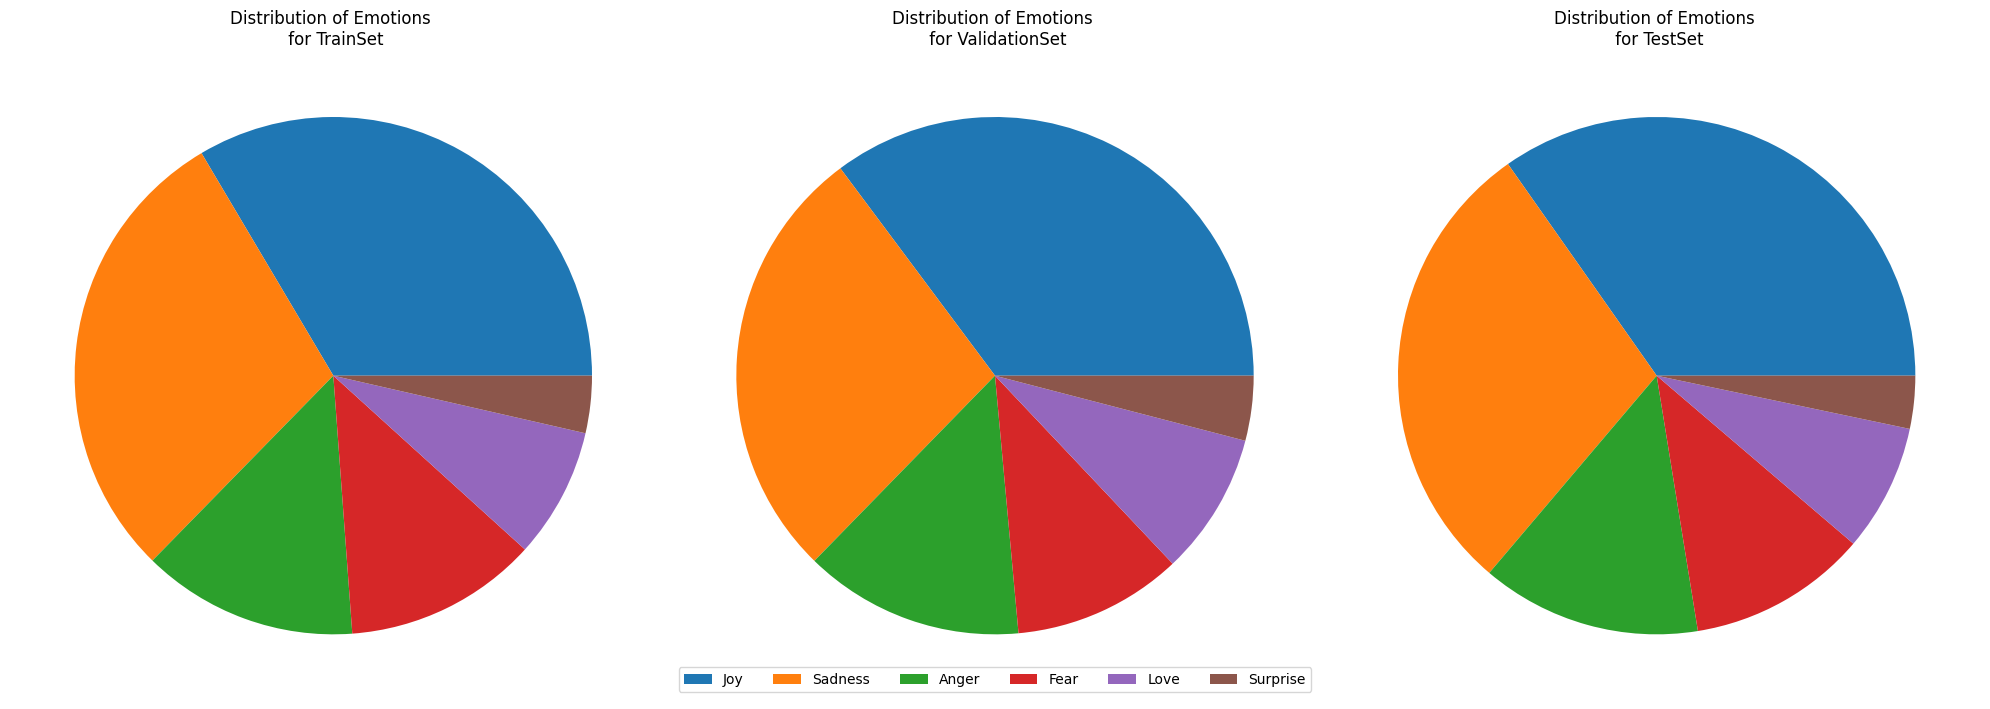

In [ ]:
labels = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprise']
fig, axes = plt.subplots(1, 3, figsize=(20,20))
axes[0].pie(train_data['label'].value_counts())
axes[0].set_title('Distribution of Emotions \n for TrainSet')
axes[1].pie(val_data['label'].value_counts())
axes[1].set_title('Distribution of Emotions \n for ValidationSet')
axes[1].legend(labels=labels, loc="lower center", mode='expand', ncol=6, labelspacing=2)
axes[2].pie(test_data['label'].value_counts())
axes[2].set_title('Distribution of Emotions \n for TestSet')
plt.tight_layout()
plt.show()

As we can see from the plots above, the emotions are well distributed over the different sets.

In [ ]:
# let's do some preprocessing, to avoid deleting some words useful for classification
def preprocess(sentence):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    sentence = re.sub('[^A-z]', ' ', sentence)
    # to avoid deleting "negative" words for classification
    negative = ['not', 'neither', 'nor', 'but', 'however', 'although',
                'nonetheless', 'despite', 'except', 'even though', 'yet']
    stop_words = [z for z in stop_words if z not in negative]
    preprocessed_tokens = [lemmatizer.lemmatize(contractions.fix(temp.lower()))
                           for temp in sentence.split()
                           if temp not in stop_words]
    return ' '.join([x for x in preprocessed_tokens]).strip()

In [ ]:
X_train, y_train = train_data['text'].apply(preprocess), pd.Categorical(train_data['label']).codes
X_val, y_val = val_data['text'].apply(preprocess), pd.Categorical(val_data['label']).codes
X_test, y_test = test_data['text'].apply(preprocess), pd.Categorical(test_data['label']).codes

### Exercise 1: Advanced transfer learning (10 points)

For this exercise, you are asked to implement some form of "advanced" transfer learning method. These include, but are not limited to, the content of Lecture 10 in the course, e.g.:

1.   **Parameter-efficient fine-tuning** (PEFT) methods (LoRA, adapters, soft prompting, ...).
2.   **Task vectors** and arithmetic in the weight space.
3.   **Model merging** and model combination (e.g., relative representations).

The following are useful surveys and papers you can take inspiration from. If you are in doubt, ask me before starting.

1. [Scaling Down to Scale Up: A Guide to Parameter-Efficient Fine-Tuning](https://arxiv.org/abs/2303.15647) - A survey on PEFT models.
2. [Modular Deep Learning](https://arxiv.org/abs/2302.11529) - A tutorial on the emerging paradigm of modular deep learning, in which networks are composed of modular building blocks. This is connected to PEFT, see in particular Section 7.
3. Examples of model merging: [model ratatouille](https://arxiv.org/abs/2212.10445), [git re-basin](https://arxiv.org/abs/2209.04836), [Fisher averaging](https://arxiv.org/abs/2111.09832).
4. Examples of task arithmetic: [simple arithmetic](https://arxiv.org/abs/2212.04089), [tangent space](https://arxiv.org/abs/2305.12827).

For this exercise, you can either transfer from two models that you trained autonomously (e.g., train one model on another dataset, add an adapter, fine-tune on the dataset you selected before), or fine-tune directly from a pre-trained model found on the web. For finding pre-trained models, you can check [tf.keras.applications](https://www.tensorflow.org/api_docs/python/tf/keras/applications), [TensorFlow model garden](https://www.tensorflow.org/guide/model_garden?hl=it), or the [Hugging Face Hub](https://huggingface.co/docs/hub/index).

> 🟥 Remember that the homework must be done fully in TensorFlow, with no external libraries (when in doubt, ask).

✍ **DESCRIPTION OF THE CODE**

*Provide a description of what you are implementing, both as text and in the comments of the code.*

**TODO**: For this part, I decided to use BERT as the pre-trained model and the PEFT methods with LoRA for the transfer learning method.

I had to use "bert_small_en_uncased" as the model, which has a 4-layer architecture, because otherwise the training wouldn't work on Colab.

At first, I'm doing a basic classification on the pre-trained model to use as a comparison with the LoRA model.

I got some inspiration for the code [here](https://keras.io/examples/nlp/parameter_efficient_finetuning_of_gpt2_with_lora/#parameterefficient-finetuning-of-gpt2-with-lora).

In [ ]:
preprocessor = keras_nlp.models.BertPreprocessor.from_preset("bert_small_en_uncased")

In [ ]:
# Pretrained classifier
model = keras_nlp.models.BertClassifier.from_preset("bert_small_en_uncased", preprocessor=preprocessor, num_classes=6)

In [ ]:
model.summary()

Preprocessor: "bert_preprocessor_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ bert_tokenizer (BertTokenizer)                     │                                              30,522 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "bert_classifier_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ segment_ids (InputLayer)      │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bert_backbone (BertBackbone)  │ [(None, 512), (None,      │      28,763,648 │ padding_mask[0][0],        │
│                               │ None, 512)]               │                 │ segment_ids[0][0],         │
│                               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ classifier_dropout (Dropout)  │ (None, 512)               │               0 │ bert_backbone[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 6)                 │           3,078 │ classifier_dropout[0][0]   │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 28,766,726 (109.74 MB)

 Trainable params: 28,766,726 (109.74 MB)

 Non-trainable params: 0 (0.00 B)

I'm using AdamW, which unlike classic Adam, the learning rate and weight decay are optimized separately.

In [ ]:
optimizer = keras.optimizers.AdamW(
    learning_rate=5e-5,
    weight_decay=0.01
)

loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3, batch_size=32)

Epoch 1/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 312s 537ms/step - accuracy: 0.6334 - loss: 0.9780 - val_accuracy: 0.9235 - val_loss: 0.1878
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 276s 550ms/step - accuracy: 0.9303 - loss: 0.1865 - val_accuracy: 0.9305 - val_loss: 0.1588
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 265s 530ms/step - accuracy: 0.9456 - loss: 0.1240 - val_accuracy: 0.9315 - val_loss: 0.1665


In [ ]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 180ms/step - accuracy: 0.9293 - loss: 0.1602


[0.1545156091451645, 0.9325000047683716]

As it is possible to see, I got an accuracy over the test set of $93.25\%$.

### Now let's use LoRA

In [ ]:
class LoraLayer(keras.layers.Layer):
  def __init__(
    self,
    original_layer,
    rank=8,
    alpha=1,
    trainable=True
  ):
    # We want to keep the name of this layer the same as the original
    # dense layer
    original_layer_config = original_layer.get_config()
    name = original_layer_config["name"]
    super().__init__(name=name, trainable=trainable)

    self.rank = rank
    self.alpha = alpha

    self._scale = alpha / rank

    # Original dense layer
    self.original_layer = original_layer
    # setting the layer frozen
    self.original_layer.trainable = False

    # LoRA dense layers.
    # Build A matrix
    self.A = keras.layers.Dense(
      units=rank,
      use_bias=False,
      # Note: the original paper mentions that normal distribution was
      # used for initialization. However, the official LoRA implementation
      # uses "Kaiming/He Initialization".
      # https://github.com/microsoft/LoRA/blob/4c0333854cb905966f8cc4e9a74068c1e507c7b7/loralib/layers.py#L124
      # initializers.HeUniform has scale=2.0
      kernel_initializer=keras.initializers.VarianceScaling(
          scale=math.sqrt(5), mode="fan_in", distribution="uniform"
      ),
      trainable=trainable,
      name=f"lora_A"
    )

    self.output_shape = original_layer_config["output_shape"]
    # build B matrix
    self.B = keras.layers.EinsumDense(
      equation=original_layer_config["equation"],
      output_shape=self.output_shape,
      kernel_initializer="zeros",
      trainable=trainable,
      name=f"lora_B"
    )

  def call(self, inputs):
    original_output = self.original_layer(inputs)
    if self.trainable == True: # only if we are fine-tuning the model
      # LoRA layer to be added to the original equation
      lora_output = self.B(self.A(inputs)) * self._scale
      return original_output + lora_output

    return original_output

In [ ]:
# Load the original model
preprocessor = keras_nlp.models.BertPreprocessor.from_preset("bert_small_en_uncased")
lora_model = keras_nlp.models.BertClassifier.from_preset("bert_small_en_uncased", preprocessor=preprocessor, num_classes=6)

In [ ]:
for layer_idx in range(lora_model.backbone.num_layers):

  decoder_layer = lora_model.backbone.get_layer(f"transformer_layer_{layer_idx}")
  self_attention_layer = decoder_layer._self_attention_layer

  self_attention_layer._tracker.locked = False

  self_attention_layer._query_dense = LoraLayer(
    self_attention_layer._query_dense,
    rank=4,
    alpha=40,
    trainable=True
  )

  self_attention_layer._value_dense = LoraLayer(
    self_attention_layer._value_dense,
    rank=4,
    alpha=40,
    trainable=True
  )

In [ ]:
for layer in lora_model._flatten_layers():
  lst_of_sublayers = list(layer._flatten_layers())
  if len(lst_of_sublayers) == 1:  # "leaves of the model"
    if layer.name in ["lora_A", "lora_B"]:
      layer.trainable = True
    else:
      layer.trainable = False

In [ ]:
# Let's now do a forward pass
lora_model(preprocessor(["i feel like I am still looking at a blank canvas blank pieces of paper"]))
pass

In [ ]:
lora_model.summary()

Preprocessor: "bert_preprocessor_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ bert_tokenizer (BertTokenizer)                     │                                              30,522 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "bert_classifier_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ segment_ids (InputLayer)      │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bert_backbone (BertBackbone)  │ [(None, 512), (None,      │      28,796,416 │ padding_mask[0][0],        │
│                               │ None, 512)]               │                 │ segment_ids[0][0],         │
│                               │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ classifier_dropout (Dropout)  │ (None, 512)               │               0 │ bert_backbone[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 6)                 │           3,078 │ classifier_dropout[0][0]   │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 28,799,494 (109.86 MB)

 Trainable params: 32,768 (128.00 KB)

 Non-trainable params: 28,766,726 (109.74 MB)

In [ ]:
optimizer = keras.optimizers.AdamW(
    learning_rate=5e-5,
    weight_decay=0.01
)

loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

lora_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
lora_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 230s 381ms/step - accuracy: 0.3206 - loss: 1.6501 - val_accuracy: 0.4980 - val_loss: 1.4348
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 233s 465ms/step - accuracy: 0.4906 - loss: 1.3944 - val_accuracy: 0.5960 - val_loss: 1.1972
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 221s 442ms/step - accuracy: 0.5764 - loss: 1.2111 - val_accuracy: 0.6690 - val_loss: 1.0736
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 233s 466ms/step - accuracy: 0.6407 - loss: 1.0972 - val_accuracy: 0.6925 - val_loss: 0.9919
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 221s 441ms/step - accuracy: 0.6691 - loss: 1.0206 - val_accuracy: 0.7175 - val_loss: 0.9160


In [ ]:
lora_model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.7412 - loss: 0.8816


[0.8700308799743652, 0.7484999895095825]

Since the accuracy on the test wasn't that great, I tried different values for $\alpha$, keeping the rank $r=4$. \\
With $\alpha = 32$ I got an accuracy of $74.34\%$, with $\alpha = 40$ I got an accuracy of $74.85\%$. So, with a higher $\alpha$, the scaling factor for the LoRA function works slightly better. \\
In both cases, there weren't that much difference, and over the accuracy, compared to the model without LoRA, there wasn't an improvement, but over the trainable parameters and time (for LoRA every epoch took ~ 30s less than the original model) there were some improvements. Maybe with an higher $\alpha$ and more epochs, the accuracy would've been better.


### Exercise 2: Interpreting the results (5 points)


**This exercise is required only for students that have not submitted the first homework, or for students who want to raise their mid-term mark (mark <= 8/10). For a mark of 8/10 or higher, an additional point can also be recovered during the exam.**

> **To recap**: if you submitted the mid-term homework, implement only Exercise 1, for a total of *10 points*. If you did not submit the mid-term homework, implement Exercises 1 and 2 for a total of *15 points*.

[LIME](https://arxiv.org/abs/1602.04938) (**Local Interpretable Model-agnostic Explanations**) is a very common explainability method, which trains a small interpretable model (e.g., a linear model) around a prediction $f(x)$ to interpret the prediction. For this exercise:

1. Read carefully the original LIME paper.
2. Re-implement the LIME algorithm and test it on 1 or 2 predictions given by your neural network (from Exercise 1).
3. This must be done fully in TensorFlow (same as the previous exercise).
4. LIME requires to select how to represent the inputs (e.g., patches of the original image). Explain your choice below.
5. Analyze the results you obtain.

In [ ]:
# TODO: Implement and test LIME.

### Final checklist

1. Carefully check all textual descriptions and the code. Insert comments when needed. <ins>Check for TODO to see if you missed anything.</ins>
2. Run everything one final time. *Please do not send me notebooks with errors or cells that are not working.*
3. Send the completed notebook following the instructions on top.

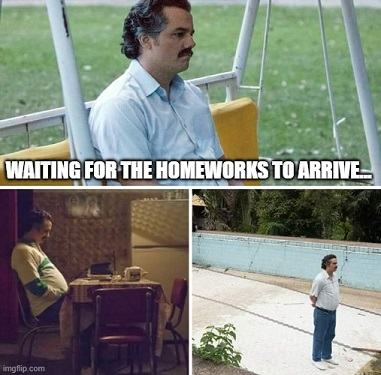